In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("train_AV3.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df=df.drop("Loan_ID", axis=1)

In [5]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
key=df.keys()
key

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# Obtaining the categories of all the categorical variables of our column
li=['Gender', 'Married','Dependents','Education', 'Self_Employed','Credit_History','Property_Area', 'Loan_Status']
for i in li:
    print(i,"is",df[i].unique())
    print(df[i].value_counts())
    print("\n")

Gender is ['Male' 'Female' nan]
Male      489
Female    112
Name: Gender, dtype: int64


Married is ['No' 'Yes' nan]
Yes    398
No     213
Name: Married, dtype: int64


Dependents is ['0' '1' '2' '3+' nan]
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Education is ['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed is ['No' 'Yes' nan]
No     500
Yes     82
Name: Self_Employed, dtype: int64


Credit_History is [ 1.  0. nan]
1.0    475
0.0     89
Name: Credit_History, dtype: int64


Property_Area is ['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Loan_Status is ['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64




In [8]:
df['Dependents']=df['Dependents'].str.replace('+','')

In [9]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
# converting the type of dependents column from object to float
df['Dependents']=pd.to_numeric(df['Dependents'], errors='coerce')

In [12]:
df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
# Using CategoricalImputer to impute missing values for categorical variables
cat=['Gender', 'Married','Dependents','Self_Employed','Credit_History']
from sklearn_pandas import CategoricalImputer
imputer=CategoricalImputer()
for i in cat:
    df[i]=imputer.fit_transform(df[i])

In [14]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [18]:
# Using median to impute missing values for continious variables
con=['LoanAmount','Loan_Amount_Term']
for i in con:
    df[i]=df[i].fillna(df[i].median())

In [19]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
# pd.set_option("display.max_column",None)
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [21]:
li

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [22]:
df=pd.get_dummies(df,columns=['Gender', 'Married','Dependents','Education', 'Self_Employed','Credit_History','Property_Area', 'Loan_Status'], drop_first=True)

In [23]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1.0,Dependents_2.0,Dependents_3.0,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1,0,0,0,0,0,0,1,0,1,1
1,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,1,1
3,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,1,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,0,0,0,0,0,0,0,1,0,0,1
610,4106,0.0,40.0,180.0,1,1,0,0,1,0,0,1,0,0,1
611,8072,240.0,253.0,360.0,1,1,1,0,0,0,0,1,0,1,1
612,7583,0.0,187.0,360.0,1,1,0,1,0,0,0,1,0,1,1


In [64]:
df.shape

(614, 15)

In [65]:
X= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.2)

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_predlg=lg.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [71]:
cm1 = confusion_matrix(Y_test,y_predlg)
print(cm1)
accuracy_score(y_predlg,Y_test)

[[11 19]
 [ 3 90]]


0.8211382113821138

# K-Nearest Neighbours

In [72]:
from sklearn.neighbors import KNeighborsClassifier
# for i in range(4,30):
#     kn =KNeighborsClassifier(n_neighbors = i)
#     kn.fit(X_train, Y_train)
#     y_predkn = kn.predict(X_test)
#     print(i,accuracy_score(y_predkn,Y_test))
kn =KNeighborsClassifier(n_neighbors = 5)
kn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
y_predkn = kn.predict(X_test)


In [74]:
cm2 = confusion_matrix(Y_test,y_predkn)
print(cm2)
accuracy_score(y_predkn,Y_test)

[[11 19]
 [ 6 87]]


0.7967479674796748

# SVM

In [75]:
from sklearn.svm import SVC
sv = SVC(kernel = 'rbf')
sv.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [76]:
y_predsv = sv.predict(X_test)

In [77]:
cm3=confusion_matrix(y_predsv,Y_test)
print(cm3)
accuracy_score(y_predsv,Y_test)

[[11  3]
 [19 90]]


0.8211382113821138

# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
y_preddt=dt.predict(X_test)

In [80]:
cm4=confusion_matrix(y_preddt, Y_test)
print(cm4)
accuracy_score(y_preddt, Y_test)

[[13 20]
 [17 73]]


0.6991869918699187

In [81]:
# Using K-Fold cross validation for getting avegafe accuracies of each model
from sklearn import model_selection
models=[]
models.append(('Linear \nRegression',LogisticRegression()))
models.append(('KNearest \nNeighbours',KNeighborsClassifier(n_neighbors = 5)))
models.append(('Support Vector \nMachine',SVC(kernel = 'rbf')))
models.append(('Decision \nTree',DecisionTreeClassifier(criterion = 'entropy')))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

Linear 
Regression: 0.802449 (0.049996)
KNearest 
Neighbours: 0.782082 (0.050821)
Support Vector 
Machine: 0.800449 (0.050452)
Decision 
Tree: 0.678204 (0.085023)


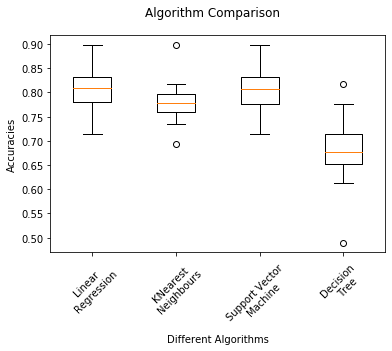

In [82]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=45)
plt.ylabel('Accuracies')
plt.xlabel('Different Algorithms')
plt.show()